In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import math

In [34]:
def sigmoid(x): # 0~1 값을 반환하는 함수 
    return 1/(1+math.exp(-x))

def deriv(x): # gradient구할 때 필요한 미분식 
    return sigmoid(x)*(1-sigmoid(x))

In [181]:
x=1
w=tf.random.normal([1],0,1) # 랜덤값 1개 얻기
b=tf.random.normal([1],0,1)
output=sigmoid(w*x+b)
print(w,b,output)

tf.Tensor([-1.0522063], shape=(1,), dtype=float32) tf.Tensor([1.182891], shape=(1,), dtype=float32) 0.9033572934185515


In [182]:
# sigmoid함수를 loss로 두고 최적화하기
'''
f(x)함수가 sigmoid일 때 w,b가 낮아질수록 오차가 줄어든다. 왜냐하면 wx+b의 값에서 w와 b를 낮추면 f(wx+b)가 낮아져서 점차 0에 가고 y가
0이므로 오차가 점점 작아진다. w와 b를 낮추는 것은 Gradient를 이용해서 구하면 되겠다.
참고로 w,b와 비례하는 wx+b를 gradient로 사용했을 때 더 잘 학습된다. 그리고 위 설명은 x가 양수인 경우에나 통한다.
단순히 최적화의 간단한 소스일 뿐이다. 
'''
lr=0.1
y=0
for i in range(100):
    output=sigmoid(w*x+b)
    error=abs(y-output)
    
    w=w-lr*deriv(w*x+b)
    b=b-lr*deriv(w*x+b)
    
    if i%10 == 9: # 일부만 출력
        print(i,error,output)

9 0.903405447759648 0.903405447759648
19 0.9034588835491778 0.9034588835491778
29 0.9035122513657603 0.9035122513657603
39 0.9035655305059659 0.9035655305059659
49 0.9036187626002209 0.9036187626002209
59 0.9036719269346551 0.9036719269346551
69 0.903725002836257 0.903725002836257
79 0.9037780111400854 0.9037780111400854
89 0.9038309519167841 0.9038309519167841
99 0.9038838252369048 0.9038838252369048


In [1]:
# Sequential API로 and 분류 모델 만들기 

import numpy as np

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[0],[0],[0]])

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x,y,epochs=1000,verbose=0)

In [9]:
output=model.predict(x)
print(output)

[[0.7032089 ]
 [0.20236574]
 [0.18666635]
 [0.02799182]]


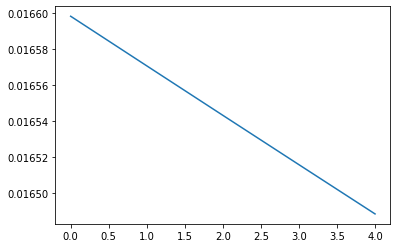

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])